In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [84]:
df = pd.read_csv("btcdata.csv")
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df.shape

(4727777, 8)

In [86]:
df = df.dropna(axis=0, subset=["Open"])
df.shape

(3484305, 8)

In [87]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [88]:
import datetime

timestamp = datetime.datetime.fromtimestamp(df.Timestamp[0])
timestamp.strftime('%Y-%m-%d')

'2011-12-31'

In [89]:
df.Timestamp = df.Timestamp.apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [90]:
df.shape

(3484305, 8)

In [91]:
df.dtypes

Timestamp             object
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [92]:
df['Timestamp'] = df['Timestamp'].astype('datetime64[ns]')
df = df.drop_duplicates('Timestamp')
df.head

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,4.39,4.39,4.39,4.39,0.455581,2.00000,4.39
1224,2012-01-01,4.58,4.58,4.58,4.58,1.502000,6.87916,4.58
3612,2012-01-02,5.00,5.00,5.00,5.00,19.048000,95.24000,5.00
4553,2012-01-03,5.32,5.32,5.32,5.32,2.419173,12.87000,5.32
5545,2012-01-04,4.93,4.93,4.93,4.93,2.320000,11.43760,4.93


In [93]:
df['Next_Close'] = df['Close'].shift(-1, fill_value=0)
df.drop(df.tail(1).index, inplace=True)
df.shape

(3285, 9)

In [94]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Next_Close
0,2011-12-31,4.39,4.39,4.39,4.39,0.455581,2.00000,4.39,4.58
1224,2012-01-01,4.58,4.58,4.58,4.58,1.502000,6.87916,4.58,5.00
3612,2012-01-02,5.00,5.00,5.00,5.00,19.048000,95.24000,5.00,5.32
4553,2012-01-03,5.32,5.32,5.32,5.32,2.419173,12.87000,5.32,4.93
5545,2012-01-04,4.93,4.93,4.93,4.93,2.320000,11.43760,4.93,5.72


In [95]:
df = df.set_index('Timestamp')
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Next_Close
Timestamp,,,,,,,,
2011-12-31,4.39,4.39,4.39,4.39,0.455581,2.00000,4.39,4.58
2012-01-01,4.58,4.58,4.58,4.58,1.502000,6.87916,4.58,5.00
2012-01-02,5.00,5.00,5.00,5.00,19.048000,95.24000,5.00,5.32
2012-01-03,5.32,5.32,5.32,5.32,2.419173,12.87000,5.32,4.93
2012-01-04,4.93,4.93,4.93,4.93,2.320000,11.43760,4.93,5.72


In [96]:
df = df.iloc[700:]

In [97]:
train_size = int(len(df)*0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]
train_data.shape, test_data.shape

((2068, 8), (517, 8))

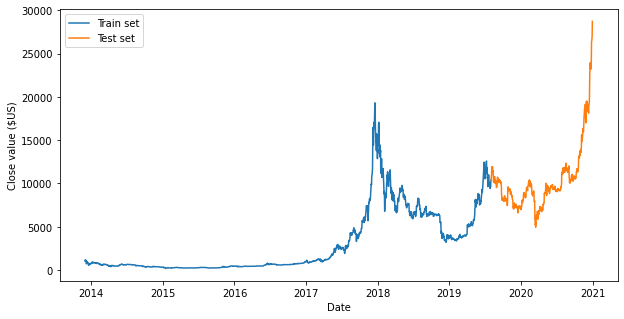

In [98]:
plt.figure(figsize=(10, 5))
plt.plot(train_data.Next_Close)
plt.plot(test_data.Next_Close)
plt.xlabel('Date')
plt.ylabel('Close value ($US)')
plt.legend(['Train set', 'Test set'], loc='upper left')

In [99]:
X_train = train_data.drop('Next_Close', axis=1)
y_train = train_data.loc[:, ['Next_Close']]

X_test = test_data.drop('Next_Close', axis=1)
y_test = test_data.loc[:, ['Next_Close']]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2068, 7), (2068, 1), (517, 7), (517, 1))

In [100]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(-1, 1))

X_train_norm = X_scaler.fit_transform(X_train)
y_train_norm = y_scaler.fit_transform(y_train)

X_test_norm = X_scaler.fit_transform(X_test)
y_test_norm = y_scaler.fit_transform(y_test)

In [101]:
def prepare_dataset(X, y, time_steps = 1):
    Xs, ys = [], []

    for i in range(len(X) - time_steps):
        v = X[i: i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
    
    return np.array(Xs), np.array(ys)

In [102]:
TIME_STEPS = 10

X_test_prepared, y_test_prepared = prepare_dataset(X_test_norm, y_test_norm, TIME_STEPS)
X_train_prepared, y_train_prepared = prepare_dataset(X_train_norm, y_train_norm, TIME_STEPS)

X_train_prepared.shape, y_train_prepared.shape

((2058, 10, 7), (2058, 1))

In [103]:
X_test_prepared.shape, y_test_prepared.shape

((507, 10, 7), (507, 1))

In [104]:
lstm_model = keras.models.Sequential([
    keras.layers.LSTM(64, return_sequences=True, input_shape=[X_train_prepared.shape[1], X_train_prepared.shape[2]]),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(64),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

In [105]:
lstm_model.compile(loss='mse', optimizer='adam')

In [106]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
lstm_history = lstm_model.fit(X_train_prepared, y_train_prepared,        
    epochs=100, 
    validation_split=0.2, 
    batch_size=32, 
    shuffle=False,          
    callbacks=[early_stopping_cb])

Epoch 1/100
52/52 [==============================] - 2s 29ms/step - loss: 0.0668 - val_loss: 0.0113
Epoch 2/100
52/52 [==============================] - 1s 13ms/step - loss: 0.0212 - val_loss: 0.0088
Epoch 3/100
52/52 [==============================] - 1s 12ms/step - loss: 0.0235 - val_loss: 0.0130
Epoch 4/100
52/52 [==============================] - 1s 12ms/step - loss: 0.0221 - val_loss: 0.0085
Epoch 5/100
52/52 [==============================] - 1s 13ms/step - loss: 0.0176 - val_loss: 0.0091
Epoch 6/100
52/52 [==============================] - 1s 13ms/step - loss: 0.0176 - val_loss: 0.0101
Epoch 7/100
52/52 [==============================] - 1s 13ms/step - loss: 0.0191 - val_loss: 0.0089
Epoch 8/100
52/52 [==============================] - 1s 15ms/step - loss: 0.0196 - val_loss: 0.0085
Epoch 9/100
52/52 [==============================] - 1s 15ms/step - loss: 0.0206 - val_loss: 0.0059
Epoch 10/100
52/52 [==============================] - 1s 17ms/step - loss: 0.0175 - val_loss: 0.0062

In [107]:
y_test_prepared = y_scaler.inverse_transform(y_test_prepared)
y_train_prepared = y_scaler.inverse_transform(y_train_prepared)

In [108]:
lstm_pred = lstm_model.predict(X_test_prepared)
lstm_pred = y_scaler.inverse_transform(lstm_pred)

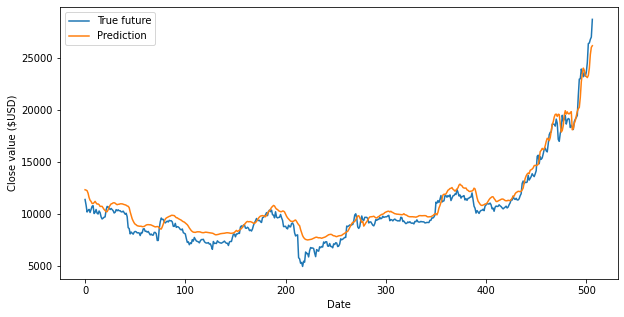

In [109]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(lstm_pred)), np.array(y_test_prepared), label='True future')
plt.plot(np.arange(len(lstm_pred)), np.array(lstm_pred), label='Prediction')
plt.xlabel('Date')
plt.ylabel('Close value ($USD)')
plt.legend(loc='upper left')

In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

np.sqrt(mean_squared_error(lstm_pred, y_test_prepared))

900.8708696631553

In [111]:
mean_absolute_error(lstm_pred, y_test_prepared)

741.1941791481756

TODO: Add a forecast and prediction for new data

TODO: Search hyperparameters

TODO: Add more features that might be related, such as stock market prices